In [1]:
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Provinces
req = urllib.request.Request('https://api.covid19tracker.ca/provinces')
response = urllib.request.urlopen(req)
the_page = response.read()
provinces = json.loads(the_page)
prov = [d['code'] for d in provinces][:-5]
prov_names = [d['name'] for d in provinces][:-5]
code_prov = list(zip(prov, prov_names))
populations = {}
for p in provinces[:-2]:
    populations[p['code']] = p['population']

In [3]:
plt.rcParams['figure.figsize'] = [12, 7]

In [4]:
def reports(province_regions, regions = True):
    if not province_regions:
        s = ''
    if regions:
        s = '/regions/'+province_regions
    else:
        s = '/province/'+province_regions
    req = urllib.request.Request('https://api.covid19tracker.ca/reports'+s)
    response = urllib.request.urlopen(req)
    page = response.read()
    reports = json.loads(page)
    if not province_regions:
        print('Reports for Canada')
    else:
        print('Reports for', province_regions)
    print('last updated:', reports['last_updated'])
    reports = reports['data']
    data = {}
    for entry in reports[0].keys():
        data[entry] = [day[entry] for day in reports]
    df = pd.DataFrame(data)
    dates = pd.to_datetime(df['date'])
    df.index = dates
    df.drop(columns = ['date'], inplace = True)
    df.fillna(value = np.nan, inplace = True)
    return df

In [5]:
def sevendays_avg(df):
    X = df.values
    X_wa = X[7:,]
    for i in range(1,7):
        X_wa = X_wa + X[7-i:-i,]
    X_wa = X_wa/7
    index = df.index[7:]
    return pd.DataFrame(X_wa, index = index, columns = df.columns)

In [6]:
canada = reports('')
ontario = reports('ON', regions = False)
alberta = reports('AB', regions = False)
toronto = reports('3595', regions = True)
ONavg = sevendays_avg(ontario)
ABavg = sevendays_avg(alberta)
twenty_one = ontario[pd.to_datetime('2021-01-01'):]

Reports for Canada
last updated: 2021-03-30 09:51:05
Reports for ON
last updated: 2021-03-30 08:57:41
Reports for AB
last updated: 2021-03-30 08:38:38
Reports for 3595
last updated: 2021-03-30 09:51:05


In [7]:
ontario[-7:]['change_cases']

date
2021-03-24    1535.0
2021-03-25    2433.0
2021-03-26    2297.0
2021-03-27    2049.0
2021-03-28    2587.0
2021-03-29    2484.0
2021-03-30       0.0
Name: change_cases, dtype: float64

In [8]:
toronto[-7:]['change_cases']

date
2021-03-24     327.0
2021-03-25    1008.0
2021-03-26     703.0
2021-03-27     863.0
2021-03-28     782.0
2021-03-29     634.0
2021-03-30       NaN
Name: change_cases, dtype: float64

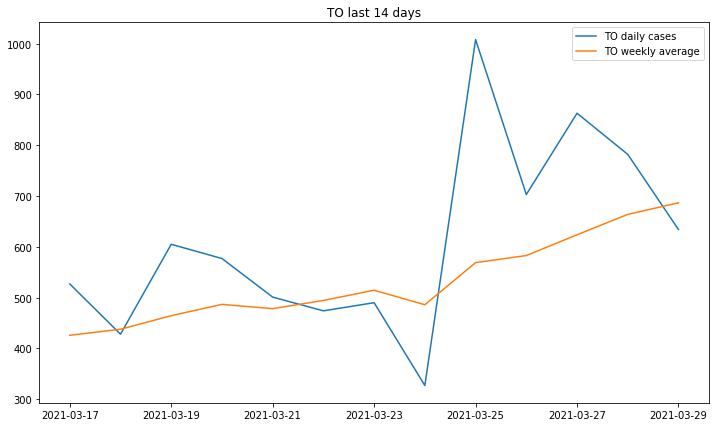

In [9]:
m =14
TOavg = sevendays_avg(toronto)
plt.plot(toronto['change_cases'][-m:])
plt.plot(TOavg['change_cases'][-m:])
plt.title('TO last '+str(m)+' days')
plt.legend(['TO daily cases', 'TO weekly average'])
plt.show()

#### Days of vaccine supply left at current vaccination rate

In [10]:
def burn_down_vaccine(df):
    vaccines_left = df['total_vaccines_distributed'] - df['total_vaccinations']
    days_left = vaccines_left/sevendays_avg(df)['change_vaccinations']
    return days_left
    #plt.plot(days_left.iloc[-14:])
    #plt.show()

Reports for ON
last updated: 2021-03-30 08:57:41
Reports for QC
last updated: 2021-03-30 09:50:26
Reports for NS
last updated: 2021-03-30 08:43:30
Reports for NB
last updated: 2021-03-30 08:38:38
Reports for MB
last updated: 2021-03-30 08:38:38
Reports for BC
last updated: 2021-03-30 08:38:38
Reports for PE
last updated: 2021-03-30 08:38:38
Reports for SK
last updated: 2021-03-30 08:38:38
Reports for AB
last updated: 2021-03-30 08:38:38
Reports for NL
last updated: 2021-03-30 08:38:38


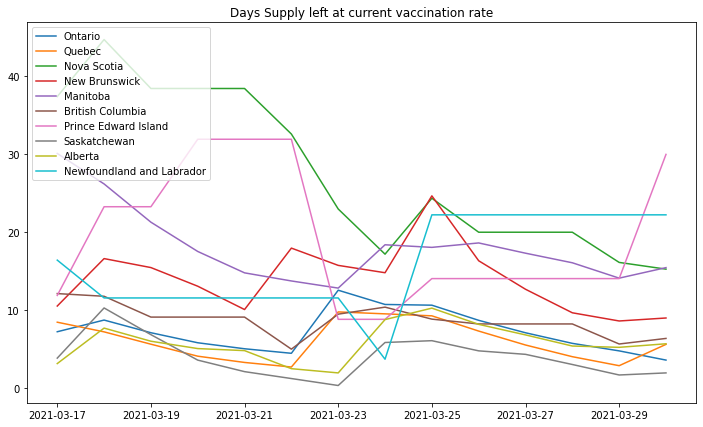

In [11]:
for p in prov:
    df = reports(p, regions = False)
    days_left = burn_down_vaccine(df)
    plt.plot(days_left.iloc[-14:])

plt.title('Days Supply left at current vaccination rate')
plt.legend([p for p in prov_names], loc = 'upper left')
plt.show()

#### Statistics at the health regions level. 

In [12]:
req = urllib.request.Request('https://api.covid19tracker.ca/regions')
response = urllib.request.urlopen(req)
the_page = response.read()
regions = json.loads(the_page)
reg = {}
for entry in regions['data'][0].keys():
    reg[entry] = [d[entry] for d in regions['data']]
regions = pd.DataFrame(reg)

In [13]:
ONregions = regions[(regions['province']=='ON')]
len(ONregions)

34

In [14]:
ONregions_dfs = []
for j in range(len(ONregions)):
    df = sevendays_avg(reports(str(ONregions.iloc[j]['hr_uid'])))
    df['engname'] = [ONregions.iloc[j]['engname']]*len(df)
    ONregions_dfs.append(df)

Reports for 3526
last updated: 2021-03-30 09:51:05
Reports for 3527
last updated: 2021-03-30 09:51:05
Reports for 3530
last updated: 2021-03-30 09:51:05
Reports for 3533
last updated: 2021-03-30 09:51:05
Reports for 3534
last updated: 2021-03-30 09:51:05
Reports for 3535
last updated: 2021-03-30 09:51:05
Reports for 3536
last updated: 2021-03-30 09:51:05
Reports for 3537
last updated: 2021-03-30 09:51:05
Reports for 3538
last updated: 2021-03-30 09:51:05
Reports for 3539
last updated: 2021-03-30 09:51:05
Reports for 3540
last updated: 2021-03-30 09:51:05
Reports for 3541
last updated: 2021-03-30 09:51:05
Reports for 3542
last updated: 2021-03-30 09:51:05
Reports for 3543
last updated: 2021-03-30 09:51:05
Reports for 3544
last updated: 2021-03-30 09:51:05
Reports for 3546
last updated: 2021-03-30 09:51:05
Reports for 3547
last updated: 2021-03-30 09:51:05
Reports for 3549
last updated: 2021-03-30 09:51:05
Reports for 3551
last updated: 2021-03-30 09:51:05
Reports for 3553
last updated: 

In [15]:
ONdata = pd.concat(ONregions_dfs, axis = 0)

In [16]:
plt.rcParams['figure.figsize'] = [15, 15]
def regions_stats(df, date, stats, prov_region = 'engname'):
    today = df[date].sort_values(stats, ascending = False)
    sns.barplot(y = prov_region, x = stats, label = 'seven days average', data = today)
    plt.title('Seven days average', fontsize = 20)
    plt.show()

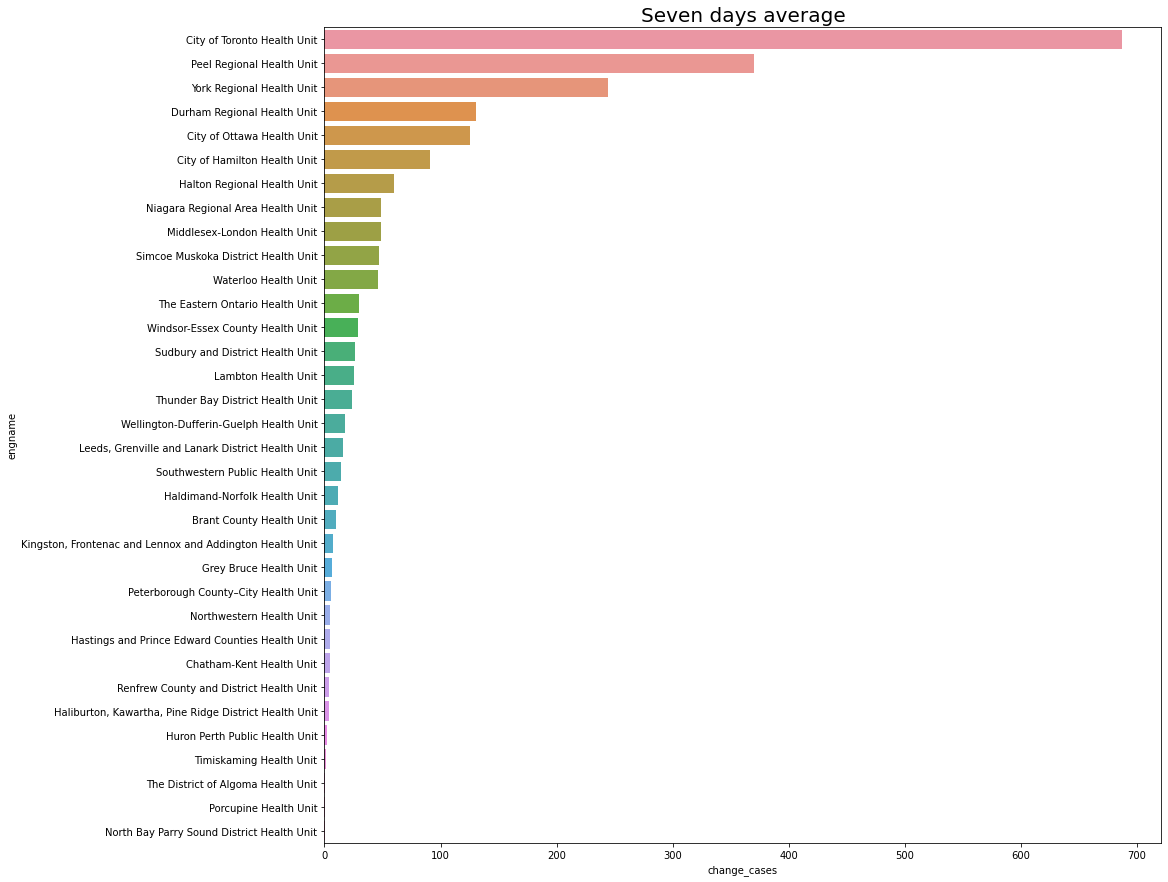

In [17]:
regions_stats(ONdata, '2021-03-29', 'change_cases')

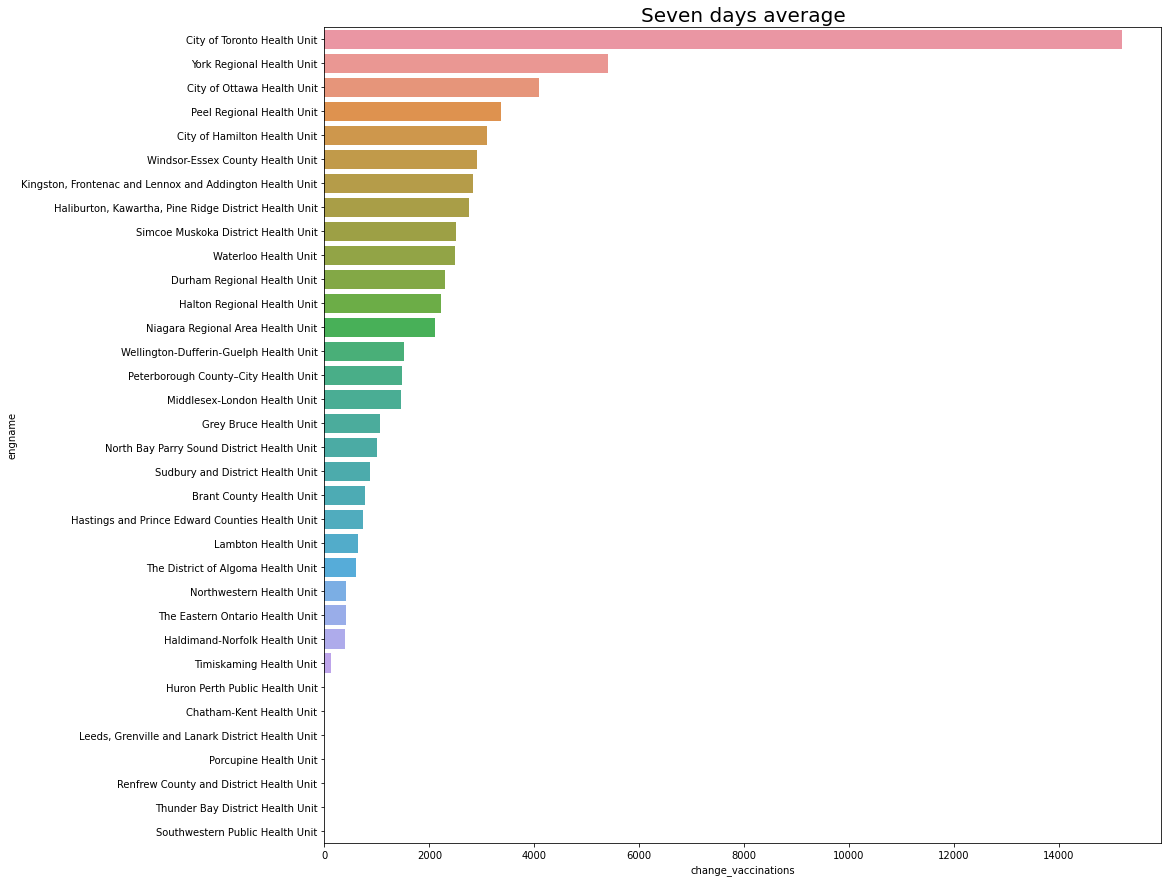

In [18]:
regions_stats(ONdata, '2021-03-29', 'change_vaccinations')

#### Statistics at the provincial level

In [19]:
code_prov

[('ON', 'Ontario'),
 ('QC', 'Quebec'),
 ('NS', 'Nova Scotia'),
 ('NB', 'New Brunswick'),
 ('MB', 'Manitoba'),
 ('BC', 'British Columbia'),
 ('PE', 'Prince Edward Island'),
 ('SK', 'Saskatchewan'),
 ('AB', 'Alberta'),
 ('NL', 'Newfoundland and Labrador')]

In [20]:
populations

{'AB': 4428112,
 'BC': 5145851,
 'MB': 1379584,
 'NB': 781315,
 'NL': 520998,
 'NS': 979115,
 'NT': 45074,
 'NU': 39285,
 'ON': 14733119,
 'PE': 159713,
 'QC': 8575779,
 'SK': 1177884,
 'YT': 42176}

In [21]:
daily_stats = ['change_cases', 'change_fatalities', 'change_tests',
       'change_hospitalizations', 'change_criticals', 'change_recoveries',
       'change_vaccinations', 'change_vaccinated',
       'change_vaccines_distributed']

In [22]:
#Pull data from the provinces, and change the daily_stats to the seven days average,
#and add a column ' in pop_percent' for every statistics. 
provinces_dfs = []
for p in code_prov:
    df = reports(p[0], regions = False)
    seven_avg = sevendays_avg(df[daily_stats])
    for stat in daily_stats:
        df[stat] = seven_avg[stat]
    for stat in df.columns:
        df[stat+' in pop_percent'] = 100*(df[stat]/populations[p[0]])
    df['Province'] = [p[1]]*len(df)
    provinces_dfs.append(df)

Reports for ON
last updated: 2021-03-30 08:57:41
Reports for QC
last updated: 2021-03-30 09:50:26
Reports for NS
last updated: 2021-03-30 08:43:30
Reports for NB
last updated: 2021-03-30 08:38:38
Reports for MB
last updated: 2021-03-30 08:38:38
Reports for BC
last updated: 2021-03-30 08:38:38
Reports for PE
last updated: 2021-03-30 08:38:38
Reports for SK
last updated: 2021-03-30 08:38:38
Reports for AB
last updated: 2021-03-30 08:38:38
Reports for NL
last updated: 2021-03-30 08:38:38


In [23]:
provinces_data = pd.concat(provinces_dfs, axis = 0)
prov_data_today = provinces_data['2021-03-29']

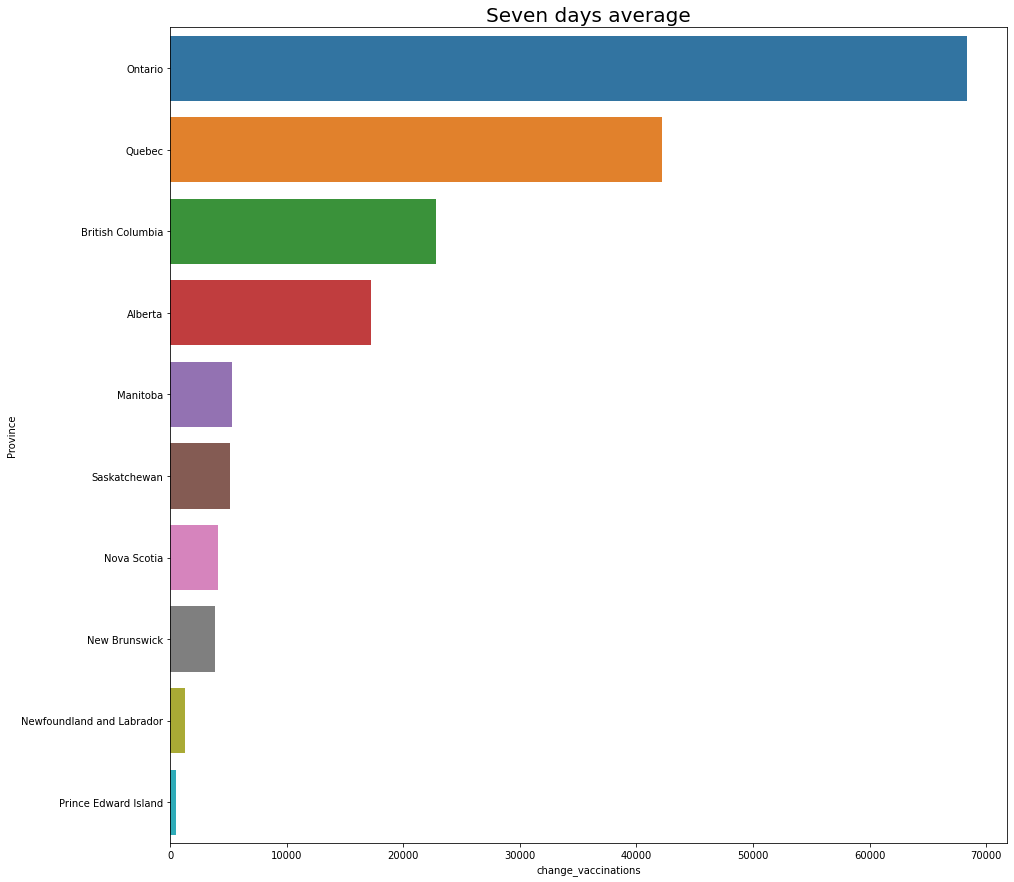

In [24]:
regions_stats(provinces_data, '2021-03-29', 'change_vaccinations', prov_region = 'Province')

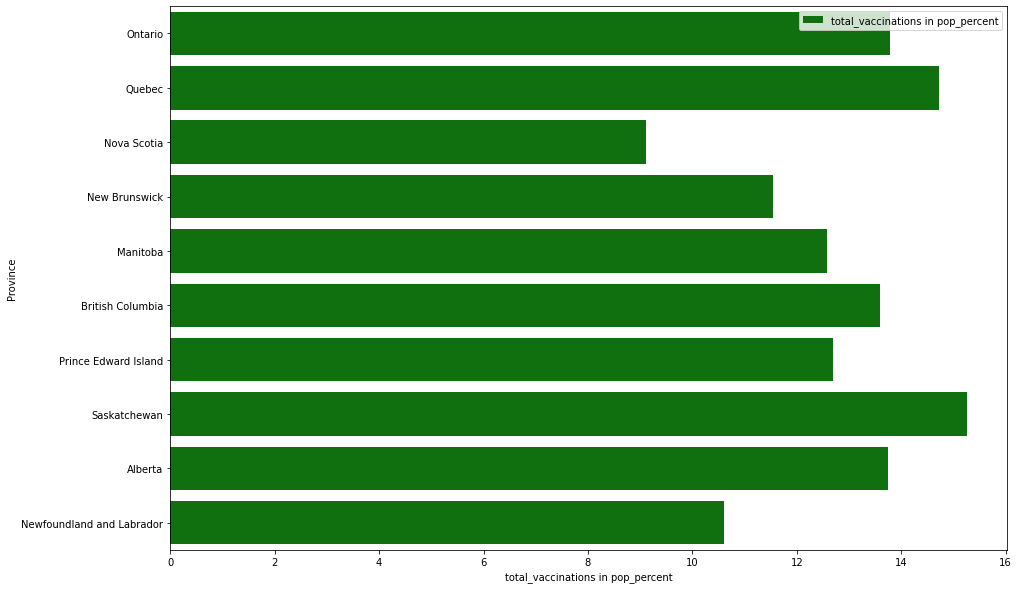

In [25]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(y = 'Province', x = 'total_vaccinations in pop_percent', label = 'total_vaccinations in pop_percent', color = 'g', data = prov_data_today)
plt.legend(loc = 'upper right')
plt.show()

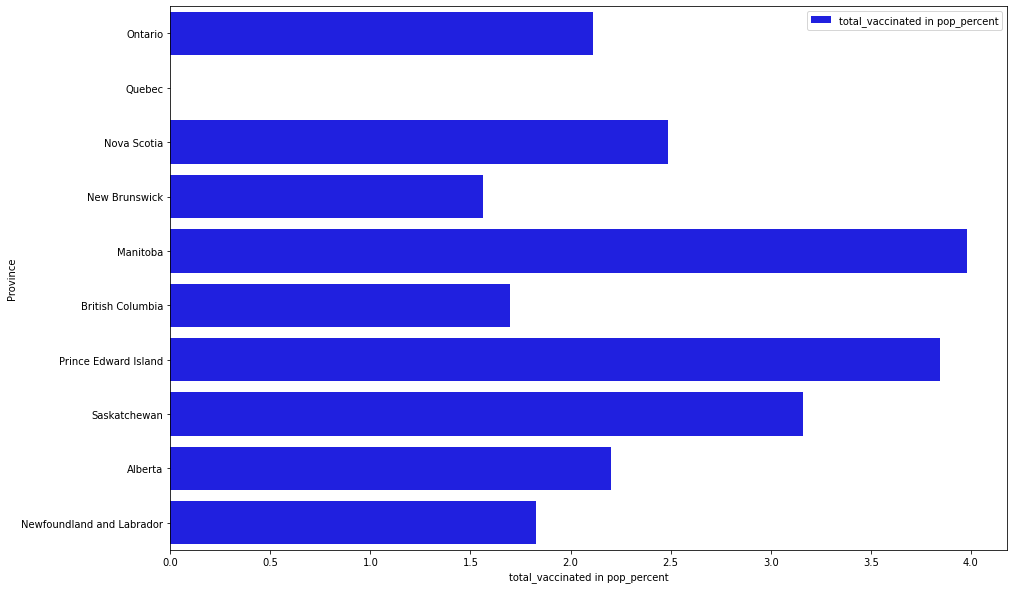

In [26]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(y = 'Province', x = 'total_vaccinated in pop_percent', label = 'total_vaccinated in pop_percent', color = 'b', data = prov_data_today)
plt.legend(loc = 'upper right')
plt.show()

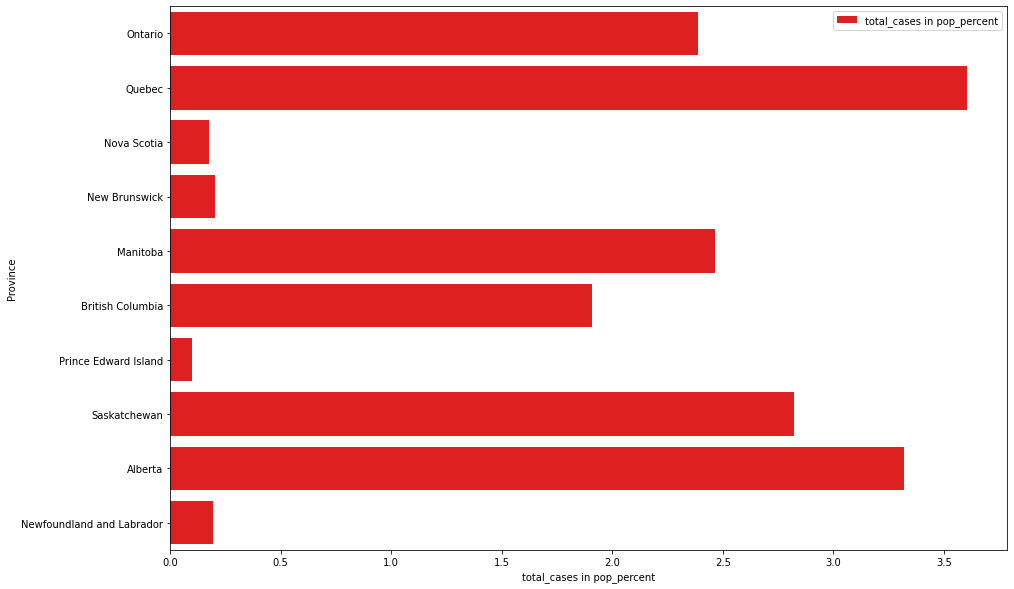

In [27]:
sns.barplot(y = 'Province', x = 'total_cases in pop_percent', label = 'total_cases in pop_percent', color = 'r', data = prov_data_today)
plt.legend(loc = 'upper right')
plt.show()

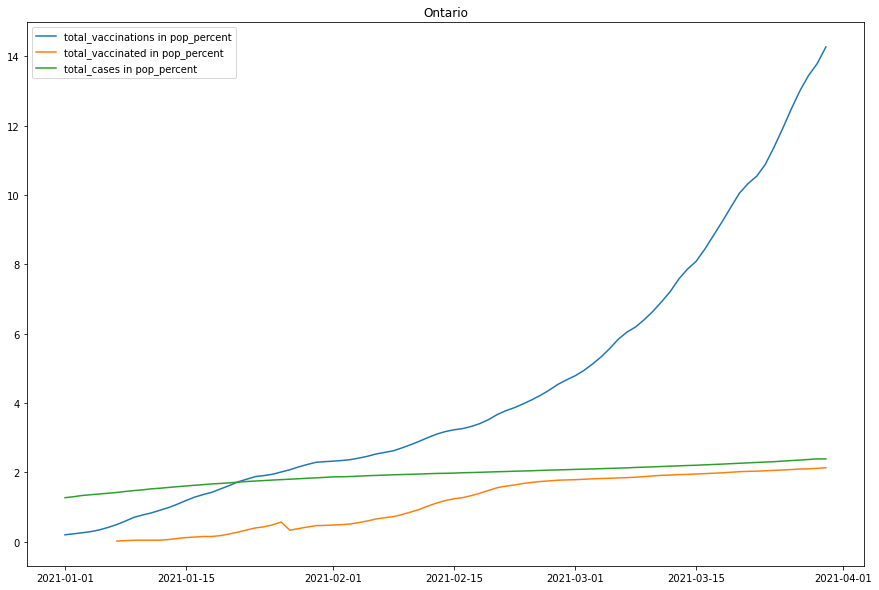

In [28]:
plt.plot(provinces_data[(provinces_data['Province']=='Ontario')]['2021-01-01':]['total_vaccinations in pop_percent'])
plt.plot(provinces_data[(provinces_data['Province']=='Ontario')]['2021-01-01':]['total_vaccinated in pop_percent'])
plt.plot(provinces_data[(provinces_data['Province']=='Ontario')]['2021-01-01':]['total_cases in pop_percent'])
plt.legend(['total_vaccinations in pop_percent', 'total_vaccinated in pop_percent', 'total_cases in pop_percent'])
plt.title('Ontario')
plt.show()

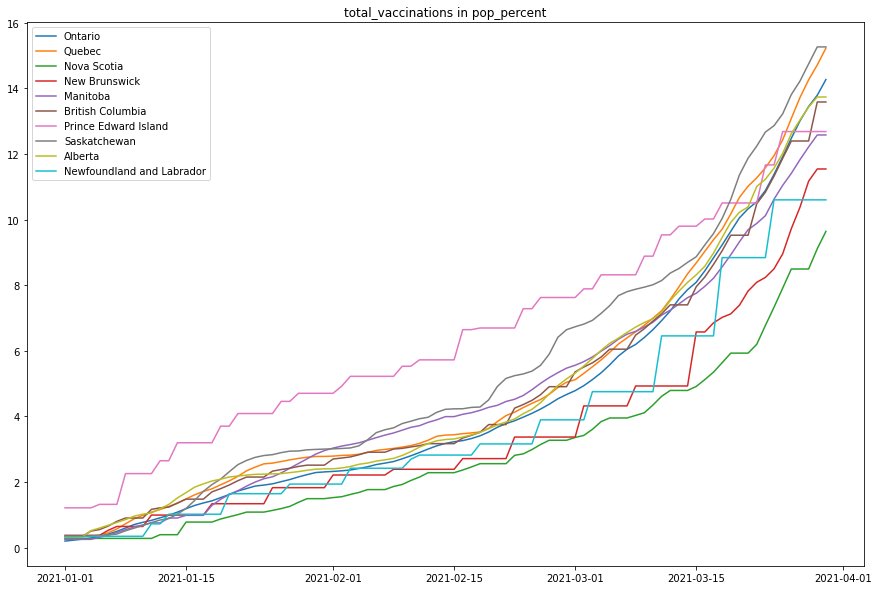

In [29]:
for p in prov_names:
    plt.plot(provinces_data[(provinces_data['Province']==p)]['2021-01-01':]['total_vaccinations in pop_percent'])
plt.legend(prov_names)
plt.title('total_vaccinations in pop_percent')
plt.show()